<a href="https://colab.research.google.com/github/Dannyhamtar/MachineLearning/blob/main/Task%20week%209/9_Regression_Case_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Danny Hamtar Pangestu**

**NIM : 1103210037**

**Lecture 9 : Binary Classsification Using Neural Network**

**Dataset : housepricedata.csv**

Dokumentasi ChatGPT : [link](https://)

#Membuat Library

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Membaca dataset

In [4]:
df = pd.read_csv('/content/sample_data/housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [32]:
X = df.drop(columns=['AboveMedianPrice'])
y = df['AboveMedianPrice']

In [33]:
#Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Membagi data menjadi set pelatihan dan pengujian
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

In [35]:
# Membangun model jaringan saraf tiruan
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [36]:
# Kompilasi model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f'Loss pada data uji: {loss}')

10/10 [==============================] - 0s 2ms/step - loss: 0.0929
Loss pada data uji: 0.09289316087961197


In [37]:
# Prediksi dengan model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)

In [22]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

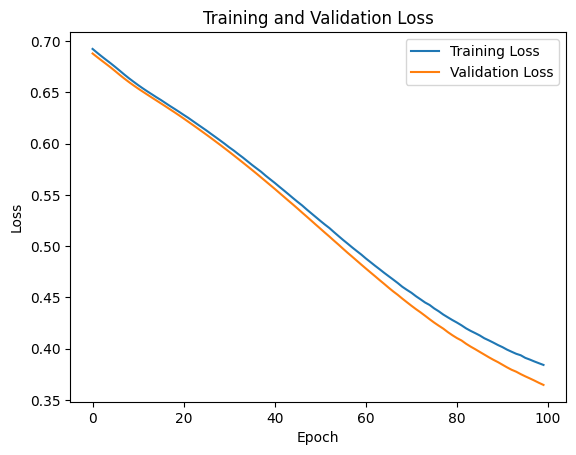

In [38]:
# Plot loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

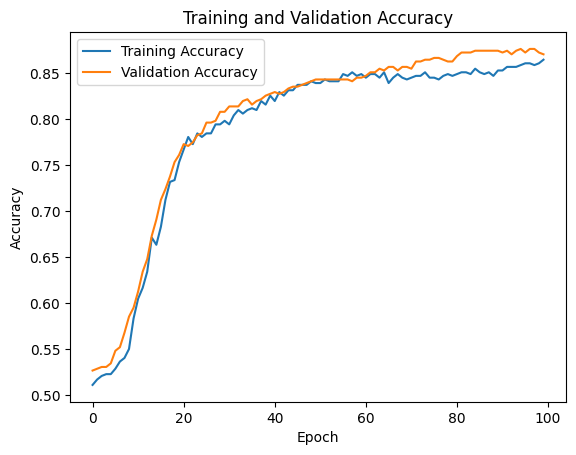

In [39]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()